# Spring 2024 CS 133 Final

In [223]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Question 1 (12 Points):

Read in all of the available data for the scientific tree species name (`namescientific`) and the neighborhood name (`name`) from the tree_tracker.db file.

Please reference the ERD visible here:
https://drive.google.com/file/d/1TYX2utHO2emExjYf5n7L8MHR74aliudr/view?usp=sharing

In [224]:
import sqlite3
conn = sqlite3.connect('/content/tree_tracker.db')
c = conn.cursor()

In [225]:
tree_df = pd.read_sql_query("SELECT * FROM tree", conn)
tree_df

,intid_tree,namescientific,neighborhood_id
0,28,Pistacia chinensis,180
1,40,Platanus acerifolia,181
2,64,Vacant site,138
3,116,Fraxinus angustifolia 'Raywood',62
4,138,Vacant site,56
...,...,...,...
17892,552604,Quercus agrifolia,18
17893,552624,Nyssa sylvatica,18
17894,552627,Nyssa sylvatica,18
17895,552630,Nyssa sylvatica,18


In [226]:
nbh_df = pd.read_sql_query("SELECT * FROM neighborhood", conn)
nbh_df

,intid_neighborhood,name
0,1,Canoas Garden and Almaden
1,2,Gramercy and Alexander
2,3,Farm and Rubino Dr
3,4,Mayfair
4,5,Owsley
...,...,...
292,293,Coyote Creek
293,294,Rancho Santa Teresa Mobile Homes
294,295,Magic Sands Mobile Homes
295,296,Westfield Oakridge


In [227]:
df = tree_df.merge(nbh_df, left_on='neighborhood_id', right_on='intid_neighborhood')
df
# could have done in SQL

,intid_tree,namescientific,neighborhood_id,intid_neighborhood,name
0,28,Pistacia chinensis,180,180,Metcalf
1,160,Quercus frainetto,180,180,Metcalf
2,2885,Unknown,180,180,Metcalf
3,3535,Pinus canariensis,180,180,Metcalf
4,4064,Pinus canariensis,180,180,Metcalf
...,...,...,...,...,...
17892,539632,Alnus rhombifolia,151,151,Meadowlands
17893,542370,Stump,151,151,Meadowlands
17894,543552,Quercus agrifolia,151,151,Meadowlands
17895,516747,Stump,255,255,Riverbend/Golden Wheel/South Bay


# Question 1.1 (0 Points):

If you cannot read in the data from the .db database, read in the data using this url instead.
`https://docs.google.com/spreadsheets/d/1K3NykNue8kdzrtSBpAhaANNYGdzXXPb_MuDOG-buU7c/export?format=csv`

Set `index_col=0` when reading in the data

# Question 2 (8 points):

Rename the columns in the data to more useable names:

|old column | new column|
|---|---|
namescientific | species
name | neighborhood

In [228]:
df.rename(columns={"namescientific": "species", "name": "neighborhood", "intid_tree":"tree_id"}, inplace=True)
df.drop('intid_neighborhood', axis=1, inplace=True)
df

,tree_id,species,neighborhood_id,neighborhood
0,28,Pistacia chinensis,180,Metcalf
1,160,Quercus frainetto,180,Metcalf
2,2885,Unknown,180,Metcalf
3,3535,Pinus canariensis,180,Metcalf
4,4064,Pinus canariensis,180,Metcalf
...,...,...,...,...
17892,539632,Alnus rhombifolia,151,Meadowlands
17893,542370,Stump,151,Meadowlands
17894,543552,Quercus agrifolia,151,Meadowlands
17895,516747,Stump,255,Riverbend/Golden Wheel/South Bay


# Question 3 (12 points):

Calculate the number of unique tree species for each of the neighborhoods.

In [238]:
species_nbh_df = df.groupby(['neighborhood']).nunique().reset_index()[['neighborhood', 'species']]
species_nbh_df

,neighborhood,species
0,Aborn and Silver Creek,14
1,Airport,14
2,Alameda,46
3,Alexian and Jackson,11
4,Alma,25
...,...,...
290,Winchester,7
291,Winchester Lynnhaven,42
292,Windmill Springs,26
293,Wooster and East Ct and West Ct,9


# Question 3.1 (0 points):

This dataframe will be used in a lot of other problems. If you didn't get it above, read it in from here:

`https://docs.google.com/spreadsheets/d/1KJGsg-gIUPLNVzXizsIF9dXpM4D1Y2rzcND8D4_KdeY/export?format=csv`

Set `index_col=0` when reading in the data

# Question 4 (12 points):

Read in this data.

`https://docs.google.com/spreadsheets/d/1NJjtgmuPHSgEb85vn9zUetHQQSsgRTM5SPhAjZXbemQ/export?format=csv`

Merge this data with the result of Question 3 to end up with a dataframe with zip code, neighborhood, and the number of unique tree species.

In [230]:
zips = pd.read_csv('https://docs.google.com/spreadsheets/d/1NJjtgmuPHSgEb85vn9zUetHQQSsgRTM5SPhAjZXbemQ/export?format=csv')
species_nbh_df = species_nbh_df.merge(zips, left_on='neighborhood', right_on='NAME')[['neighborhood', 'species', 'ZIPCODE']]
species_nbh_df

,neighborhood,species,ZIPCODE
0,Aborn and Silver Creek,14,['95121' '95122']
1,Airport,14,['95050' '95054' '95126' '95131' '95110']
2,Alameda,46,['95050' '95126' '95110']
3,Alexian and Jackson,11,['95116' '95133']
4,Alma,25,['95125' '95110' '95112']
...,...,...,...
290,Winchester,7,['95050' '95051' '95117' '95128']
291,Winchester Lynnhaven,42,['95117' '95128']
292,Windmill Springs,26,['95121']
293,Wooster and East Ct and West Ct,9,['95116' '95133' '95112']


# Question 5 (12 points):
Subset the data from Question 4 to only include neighborhoods that belong completely to one zip code.

Note: This is maybe tricky/time consuming, I would recommend doing this out of order.

Hints:

* This is maybe similar to the "genre" column with the anime dataset
*   https://saturncloud.io/blog/how-to-split-one-column-into-multiple-columns-in-pandas-dataframe/
*   Remember all of your different tools, and choose your path:
  * apply
  * map
  * concat
  * merge
  * melt
  * groupby
  * isna




In [231]:
def count_nbh(n):
    return n.count("'") / 2

species_nbh_df['zipcode_counts'] = species_nbh_df['ZIPCODE'].map(count_nbh).astype(int)
one_nbh_df = species_nbh_df[species_nbh_df['zipcode_counts'] == 1]
one_nbh_df

,neighborhood,species,ZIPCODE,zipcode_counts
5,Almaden Country Club,24,['95120'],1
8,Almaden Meadows,21,['95120'],1
13,Bagby,27,['95124'],1
18,Berryessa Creek,10,['95132'],1
20,Berryessa Flea Market-BART,16,['95133'],1
...,...,...,...,...
280,Warner Heights,20,['95127'],1
285,Williams,23,['95120'],1
286,Willow Glen South,16,['95125'],1
287,Willow Glen West,26,['95125'],1


#Question 6 (12 points):


Plot the plot shown [here](https://docs.google.com/document/d/1wmSI3LmPn0cltxC3CAFpikNKx0vk144pJc6_6ARkL3s/edit#heading=h.dktvgep2pkvy)

If you did not complete Question 5, read in the data here:

`https://docs.google.com/spreadsheets/d/123EVd0pNO_iGM9D-6QOdVcScH1cfafCgIGdoFkubs6A/export?format=csv`



*   Don't worry about matching color scheme
*   Limit the data to the 10 zipcodes with the most neighborhoods
* Order the zipcodes on the y-axis in increasing or decreasing order
* Do not let the distribution extend past the known observations
* title the plot with your observation about which zip code has the neighborhoods with the lowest level of tree diversity (fewest number of unique species)
* You may want to adjust the `height` parameter





Text(0.5, 1.0, "ZIPCODE    ['95127'] Has the Least Unique Species")

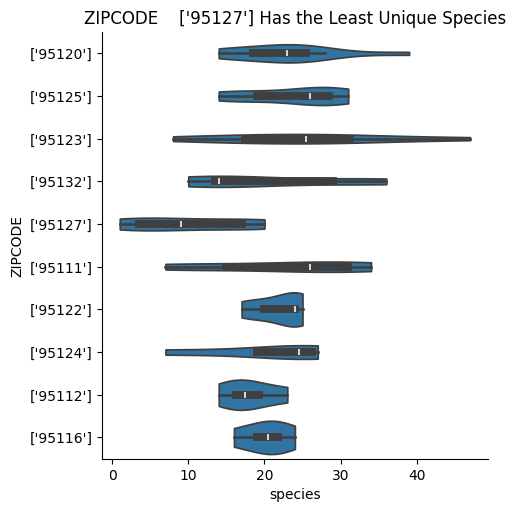

In [273]:
import seaborn as sns

popular_zips = one_nbh_df.groupby('ZIPCODE').size().reset_index().sort_values(0, ascending=False).head(10)
popular_zips.columns = ['ZIPCODE', 'Number of Occurences']
# print(popular_zips)

speceis_pop_zips = one_nbh_df[one_nbh_df.ZIPCODE.isin(popular_zips.ZIPCODE)]

sns.catplot(
    data=speceis_pop_zips,
    y="ZIPCODE",
    x="species",
    kind="violin",
    order=popular_zips.ZIPCODE,
    cut=0
    )

lowest_diversity_zip = speceis_pop_zips.groupby('ZIPCODE').species.sum().reset_index().sort_values('species').iloc[0,:1].to_string()

plt.title(lowest_diversity_zip + " Has the Least Unique Species")

# Question 7 (8 points)

Which San Jose neighborhood has the highest number of unique tree species?

(Use the Dataframe from Question 3 to answer)

In [275]:
species_nbh_df.groupby('neighborhood').species.sum().reset_index().sort_values('species').tail(1)

,neighborhood,species
168,Norwood,72


# Question 8 (12 points):

Make a choropleth map of the number of unique tree species in each neighborhood.

Use the dataframe from question 3.

There's an example very close to this in lecture notes - scroll all the way down.

For your Choropleth:
*   `key_on="properties.NAME"`
*   `columns=['neighborhood', 'species']` <- You may need something similar? (make sure you match to your actual column names!)
* change the color scheme to "Greens"
* Include the neighborhood name on hover

For your folium Map:

*   `tiles="CartoDB Positron"` (we don't want greens to blend in with the green nature)

[Example Plot Here](https://docs.google.com/document/d/1wmSI3LmPn0cltxC3CAFpikNKx0vk144pJc6_6ARkL3s/edit#heading=h.lajjgsrqdjmj)





In [280]:
import folium

nbh_geo = "https://raw.githubusercontent.com/maxdokukin/CS-133/main/Neighborhoods.geojson"

treemap = folium.Map(location=[37.3, -121.8], zoom_start=11)

choropleth = folium.Choropleth(
    geo_data=nbh_geo,
    data=species_nbh_df,
    name='choropleth',
    columns=['neighborhood', 'species'],
    key_on='properties.NAME',
    fill_color= 'Greens',
    legend_name='Unique Tree Species',
    tiles="CartoDB Positron"
).add_to(treemap)

style_function = "font-size: 15px; font-weight: bold"

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['NAME'],style=style_function, labels=False)
)

treemap

# Question 9 (12 Points):

A lot of people chose the Bay Area Housing Prices dataset to use for the ML Project. Several people said  something like "It's kind of hard to see, but..." while they were showing their map visualization.  

**For this question, please update this code to make it easier to see the trends in housing prices.**

**Use sns.relplot to plot Longitude vs Latitude.**

**Pseudocode or sketching could get up to 2/3 of the points for this problem.**

If you're not sure where to start, think about if you had a certain budget for buying a house. What might a figure look like to help you decide what area to look in?

Hint: you may want to read about the `hue_norm` parameter. But other parameters would could help as well.
https://seaborn.pydata.org/generated/seaborn.relplot.html

**Note: For the purposes of this exam, I am okay with legends being a bit of a mess with this plot, but please add a comment so I know you know what the issue is with the legend**.


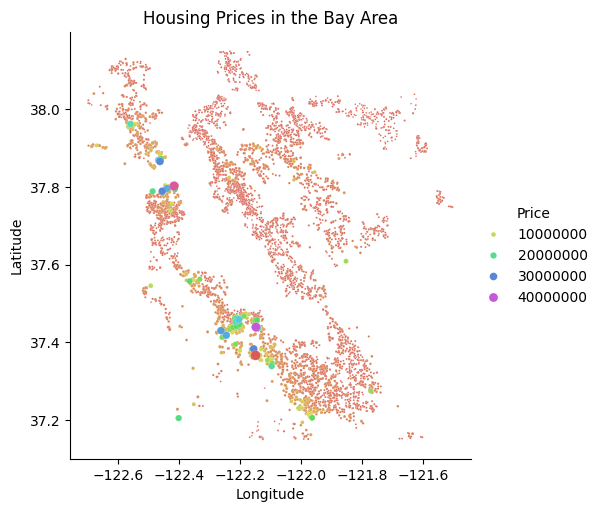

In [296]:
housing = pd.read_csv('https://raw.githubusercontent.com/csbfx/cs133/main/sf_bayarea_house_prices.csv')

sns.relplot(
    data=housing.sort_values('Price'),
    x="Longitude",
    y="Latitude",
    hue='Price',
    size='Price',
    sizes=(1, 50),
    palette='hls'
)

plt.title("Housing Prices in the Bay Area");
# should adjust labels to have lower values

#Bonus 1 (1 point):

Make a bar plot of the 5 neighborhoods with the highest number of unique tree species.

I would like the bar plot to:


*   Be titled
*   Be sorted high -> low
* Be all green (ideally a tree-like green)
  * https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
* Have the numerical labels on the bars
  * https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar_label.html




[Text(0, 0, '72'),
 Text(0, 0, '61'),
 Text(0, 0, '56'),
 Text(0, 0, '54'),
 Text(0, 0, '53'),
 Text(0, 0, '47'),
 Text(0, 0, '47'),
 Text(0, 0, '47'),
 Text(0, 0, '46'),
 Text(0, 0, '45')]

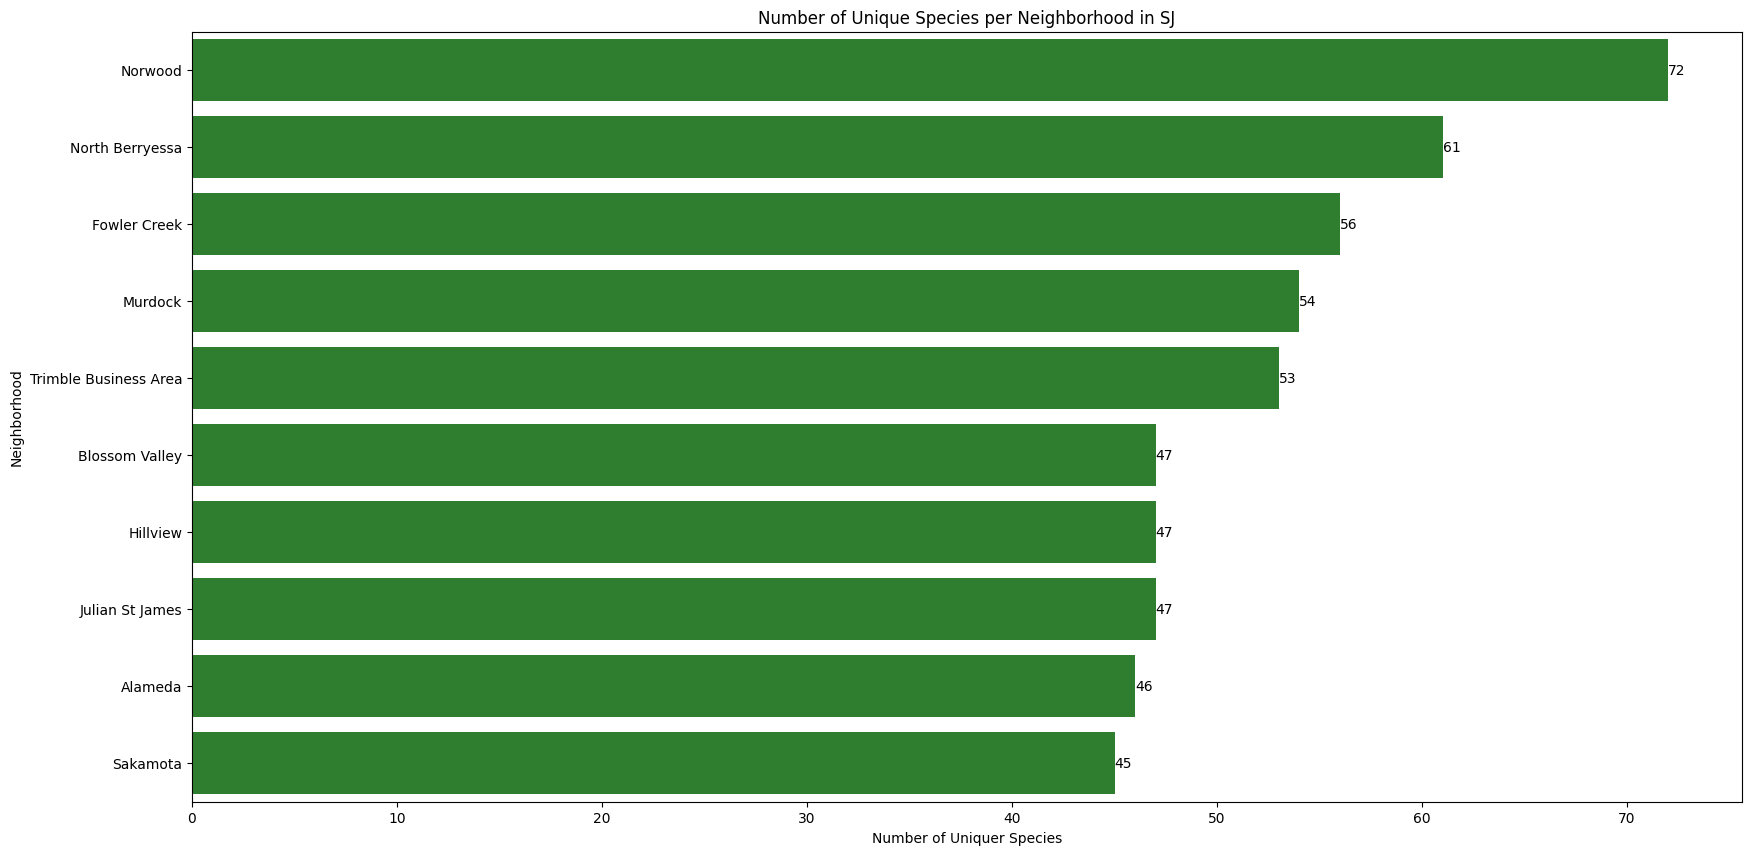

In [236]:
# Filter to get top 10 beer-consuming countries
data = species_nbh_df.sort_values('species', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(20, 10))
ax = sns.barplot(
    data=data,
    x="species",
    y="neighborhood",
    orient="h",
    color='forestgreen'
)

ax.set(xlabel='Number of Uniquer Species', ylabel='Neighborhood')
plt.title('Number of Unique Species per Neighborhood in SJ')

ax.bar_label(ax.containers[0])

# Bonus 2 (1 point):

Repeat the steps in Question 1, but using the full database of information, rather than a selection:
tree_tracker2.db


*   Calculate which tree occurs most frequently in each neighborhood
  * ignore "Vacant site", "Unknown" or other missing tree species
*   Plot a countplot of in how many neighborhoods each tree species is the most prevalent (restrict to top X or bottom X or a specific genus - up to you, but make sure I can read all of the labels you have on your plot)



In [297]:
c.close()

conn = sqlite3.connect('/content/tree_tracker2.db')
c = conn.cursor()

In [339]:
tree_df2 = pd.read_sql_query("SELECT * FROM tree", conn)
nbh_df2 = pd.read_sql_query("SELECT * FROM neighborhood", conn)
df2 = tree_df.merge(nbh_df, left_on='neighborhood_id', right_on='intid_neighborhood')
df2.rename(columns={'intid_tree':'tree_id', 'namescientific':'species', 'name':'neighborhood'}, inplace=True)
df2.drop('intid_neighborhood', axis=1, inplace=True)
df2 = df2[(df2.species != 'Vacant site') & (df2.species != 'Unknown')]
df2

,tree_id,species,neighborhood_id,neighborhood
0,28,Pistacia chinensis,180,Metcalf
1,160,Quercus frainetto,180,Metcalf
3,3535,Pinus canariensis,180,Metcalf
4,4064,Pinus canariensis,180,Metcalf
5,5262,Calocedrus decurrens,180,Metcalf
...,...,...,...,...
17892,539632,Alnus rhombifolia,151,Meadowlands
17893,542370,Stump,151,Meadowlands
17894,543552,Quercus agrifolia,151,Meadowlands
17895,516747,Stump,255,Riverbend/Golden Wheel/South Bay


In [358]:
tree_counts = df2.groupby(['neighborhood', 'species']).size().reset_index()
tree_counts.columns = ['neighborhood', 'species', 'occurences']

idx = tree_counts.groupby(['neighborhood'])['occurences'].idxmax()
max_occurences = tree_counts.loc[idx]
max_occurences

,neighborhood,species,occurences
6,Aborn and Silver Creek,Lagerstroemia indica,5
22,Airport,Ulmus parvifolia,4
50,Alameda,Platanus acerifolia,39
70,Alexian and Jackson,Fraxinus angustifolia 'Raywood',4
87,Alma,Magnolia grandiflora,4
...,...,...,...
6231,Winchester,Acer negundo,1
6252,Winchester Lynnhaven,Lagerstroemia indica,10
6287,Windmill Springs,Liquidambar styraciflua,7
6305,Wooster and East Ct and West Ct,Platanus acerifolia 'Yarwood',2


[Text(0, 0, 'Cupressus sempervirens'),
 Text(0, 0, 'Liquidambar styraciflua'),
 Text(0, 0, 'Cupressus sempervirens'),
 Text(0, 0, 'Pistacia chinensis'),
 Text(0, 0, 'Pistacia chinensis'),
 Text(0, 0, 'Platanus acerifolia'),
 Text(0, 0, 'Pistacia chinensis'),
 Text(0, 0, 'Zelkova serrata'),
 Text(0, 0, 'Platanus acerifolia'),
 Text(0, 0, 'Liquidambar styraciflua')]

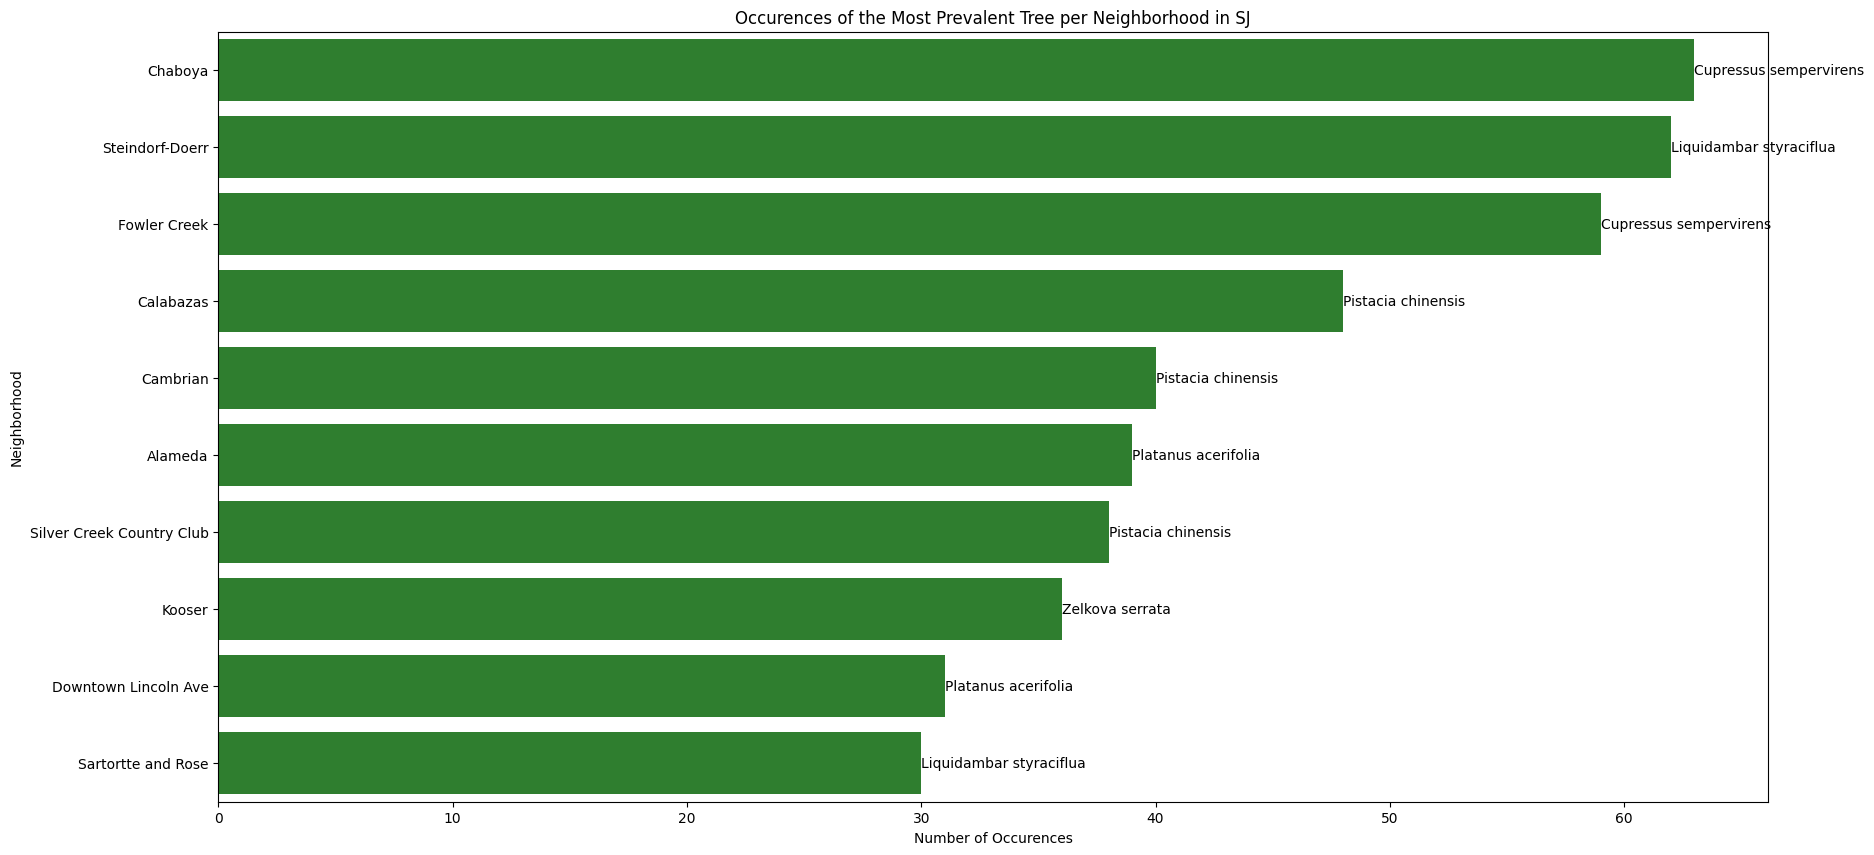

In [360]:
# plotting task is not clear. I made the best I could think of

data = max_occurences.sort_values('occurences', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(20, 10))
ax = sns.barplot(
    data=data,
    x="occurences",
    y="neighborhood",
    orient="h",
    color='forestgreen'
)

ax.set(xlabel='Number of Occurences', ylabel='Neighborhood')
plt.title('Occurences of the Most Prevalent Tree per Neighborhood in SJ')

ax.bar_label(ax.containers[0], labels=data['species'])

# Bonus 3 (1 point):

Using the larger dataset you got from Bonus 2 (or follow those instructions):


*   create a plot* showing how related each neighborhood and each tree species is to one another based on the frequency of counts of trees in each of the neighborhoods
  * *if you are unsure what plot type this would be, please raise your hand
   * ignore "Vacant site", "Unknown" or other missing tree species when calculating counts



/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



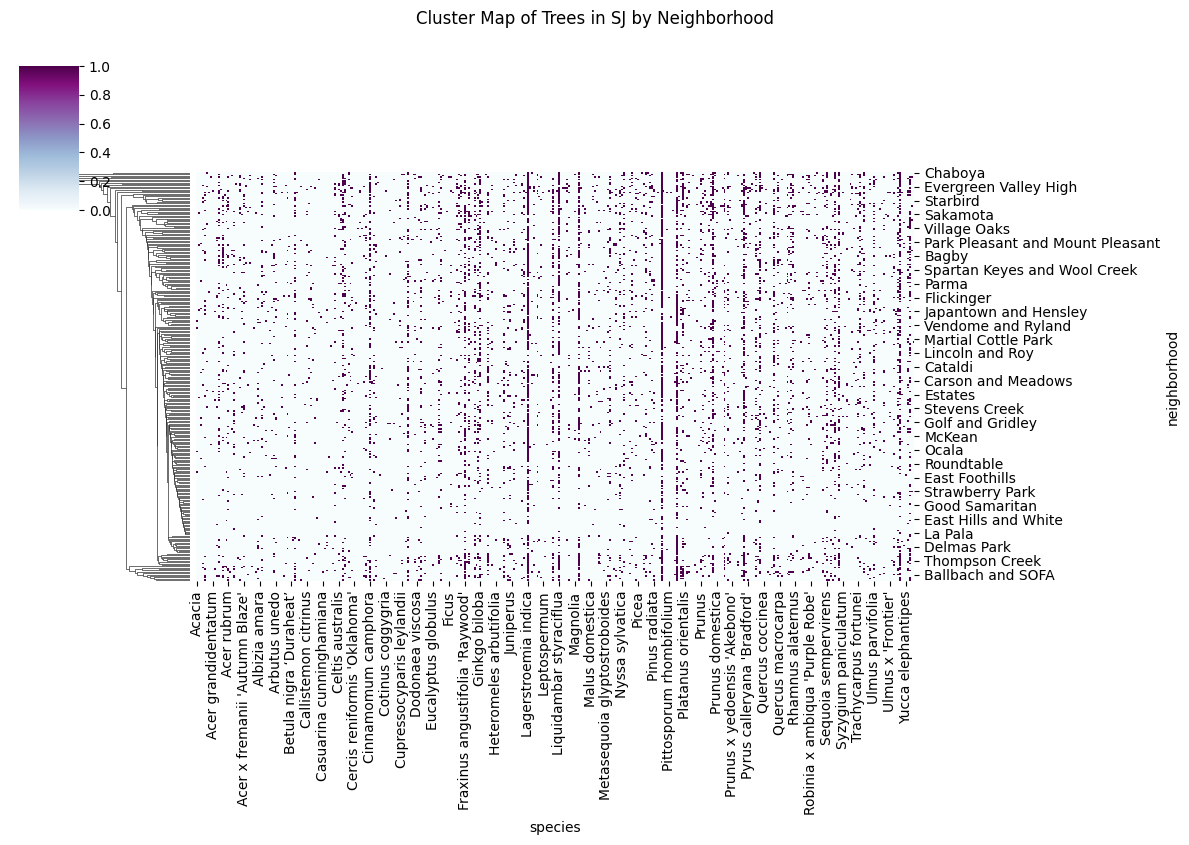

In [363]:
tree_counts = df2.groupby(['neighborhood', 'species']).size().reset_index()
tree_counts.columns = ['neighborhood', 'species', 'occurences']

pivoted = tree_counts.pivot(index="neighborhood", columns="species", values="occurences")
pivoted = pivoted.fillna(0)
# pivoted

g=sns.clustermap(
    pivoted,
    cmap="BuPu",
    vmax=1,
    col_cluster=False,
    figsize=(12,8),
)
g.fig.suptitle("Cluster Map of Trees in SJ by Neighborhood", y=1.05);